In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import functions

## How does hammerdirt see this problem?
### Observation oriented
### Correlated with data analysis
### Value the observations of the average person

In [2]:
here = os.getcwd()
lakes = here + '/lakedata'
data = here + '/data'

In [3]:
initial_time_series = functions.initial_time_series
initial_scatter = functions.initial_scatter
lem_zur = functions.lem_zur
dists = functions.dists
pop_scatter = functions.pop_scatter

In [4]:
zurich = pd.read_pickle(data + '/zurich_see.p')
zurich_see = pd.read_pickle(data + '/zur_see_loc.p')
c_a = pd.read_pickle(data + '/combined.p')
codes = pd.read_pickle(data+'/codes.p')
m_a = pd.read_pickle(data + '/combined_mc.p')
leman_onex = pd.read_pickle(data + '/leman_onex.p')
leman_twox = pd.read_pickle(data + '/leman_twox.p')
z_see = pd.read_pickle(data + '/z_see.p')
c_a_one = pd.read_pickle(data + '/c_a_one.p')
m_a_one = pd.read_pickle(data + '/m_a_one.p')
c_a_xtwo = pd.read_pickle(data + '/c_a_xtwo.p')
m_a_onex = pd.read_pickle(data + '/m_a_onex.p')
c_a_xthree= pd.read_pickle(data + '/c_a_xthree.p')
c_a_xfour= pd.read_pickle(data + '/c_a_xfour.p')
dfZur_see= pd.read_pickle(data + '/dfZur_see.p')
dfLem_see= pd.read_pickle(data + '/dfLem_see.p')
l_one_p = pd.read_pickle(data + '/l_one_p.p')
l_two_p = pd.read_pickle(data + '/l_two_p.p')
z_see_p = pd.read_pickle(data + '/z_see_p.p')
leman_one = pd.read_pickle(data + '/leman_one.p')
leman_two = pd.read_pickle(data + '/leman_two.p')
montreux = pd.read_pickle(data + '/montreux.p')

## It starts with one observation
### Call that a point
### Put as much information in that point as we can

#### There are over 1'000 points in the chart below
#### Each point contains the following information:

1. Administravtive : date, postal code, city name, city area, pop density, population
2. Geographic : GPS, body of water, altitude
3. Item : Description, material type, MLW code, hammerdirt classification, quantity
4. Hydrologic : lake level
5. Where available: Hotel nights sold per month 

#### coming soon:

1. River discharge rates
2. Revenue sources (by city and secteur of the economy)
3. Lake or river name, river basin name
4. District, canton, 

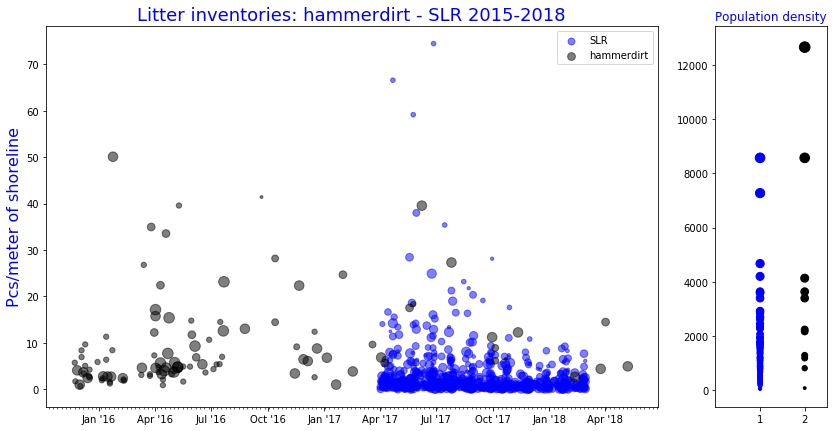

In [5]:
initial_time_series(c_a_one, m_a_one)

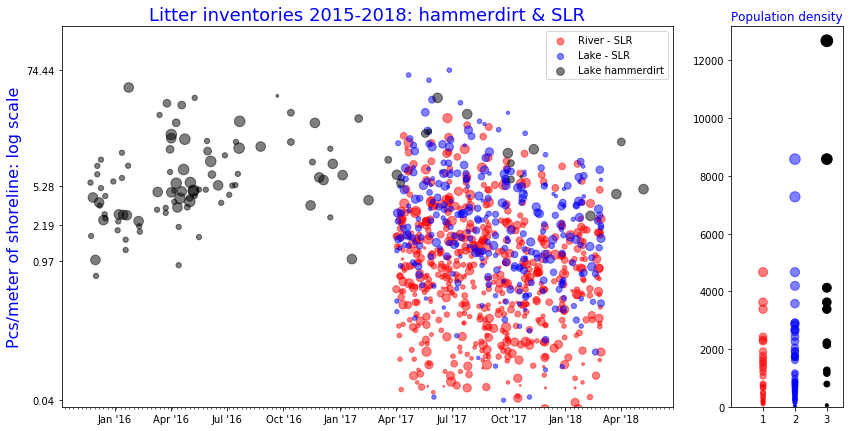

In [6]:
initial_scatter(c_a_xthree,c_a_xfour, m_a_onex )

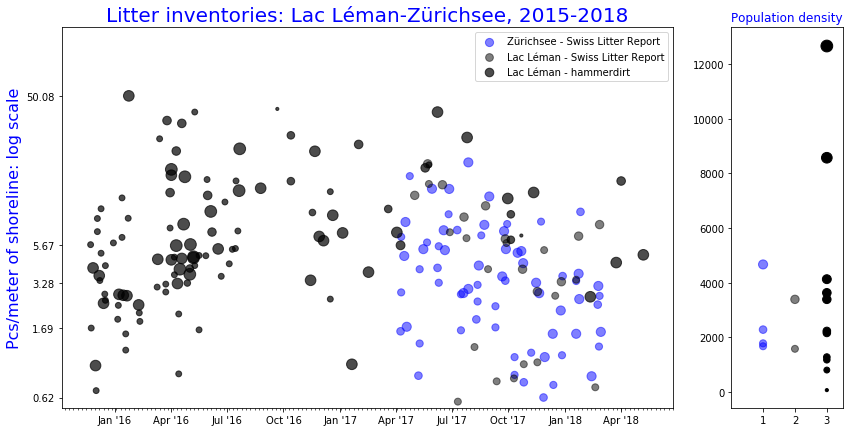

In [7]:
lem_zur(dfZur_see, dfLem_see, m_a_one)

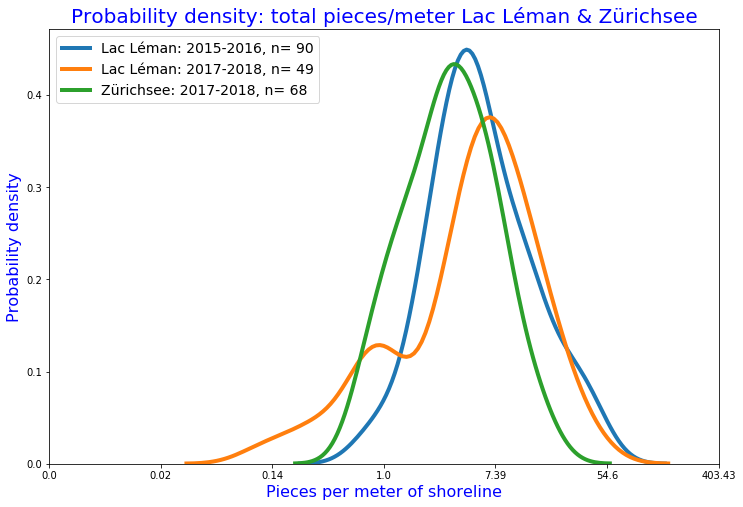

In [8]:
dists(leman_onex.ln, leman_twox.ln, z_see.ln, 'total pieces/meter')

In [9]:
def code_source(x):
    a = {}
    for i in x:
        b = {i['code']:i['source']}
        a.update(b)
    return a
sources = code_source(codes)

In [10]:
l_one_g = l_one_p.groupby(sources, level=1, axis=1).sum()
l_two_g = l_two_p.groupby(sources, level=1, axis=1).sum()
z_see_g = z_see_p.groupby(sources, level=1, axis=1).sum()
l_one_g.replace(0, .001, inplace=True)
l_two_g.replace(0, .001, inplace=True)
z_see_g.replace(0, .001, inplace=True)

In [11]:
def get_ln_s(a, b):
    a[b+'_ln'] = np.log(a[b])
get_ln_s(l_one_g, 'Food')
get_ln_s(l_two_g, 'Food')
get_ln_s(z_see_g, 'Food')
get_ln_s(l_one_g, 'Medical')
get_ln_s(l_two_g, 'Medical')
get_ln_s(z_see_g, 'Medical')
get_ln_s(l_one_g, 'Fragmented')
get_ln_s(l_two_g, 'Fragmented')
get_ln_s(z_see_g, 'Fragmented')

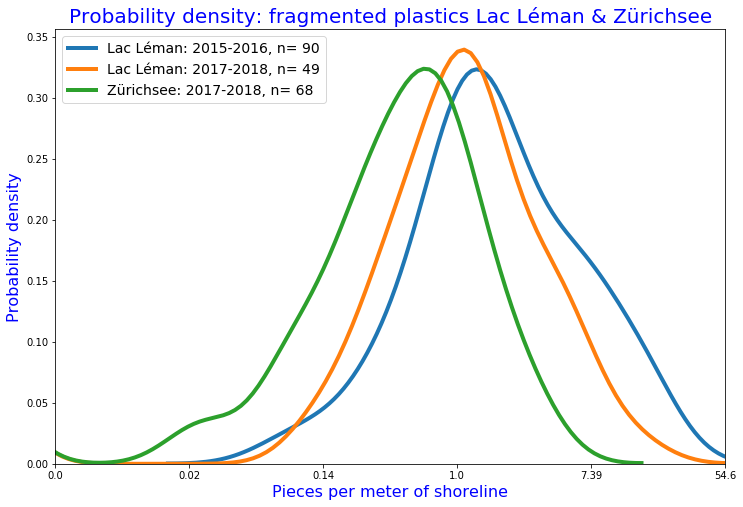

In [12]:
dists(l_one_g.Fragmented_ln, l_two_g.Fragmented_ln, z_see_g.Fragmented_ln, 'fragmented plastics')

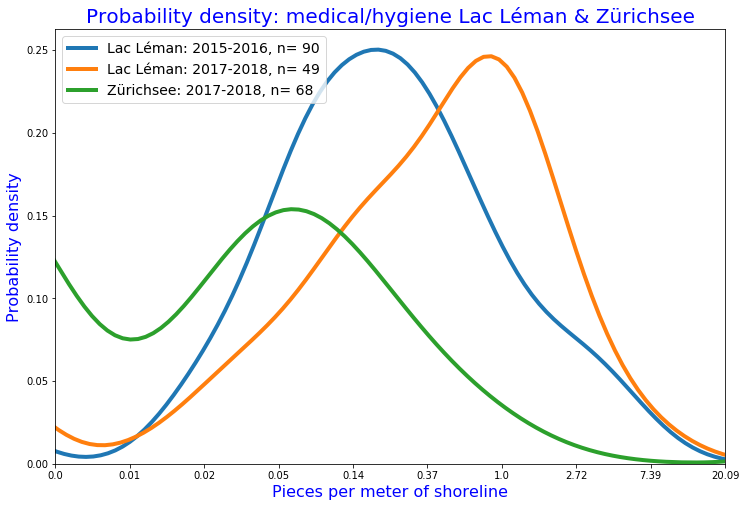

In [13]:
dists(l_one_g.Medical_ln, l_two_g.Medical_ln, z_see_g.Medical_ln, 'medical/hygiene')

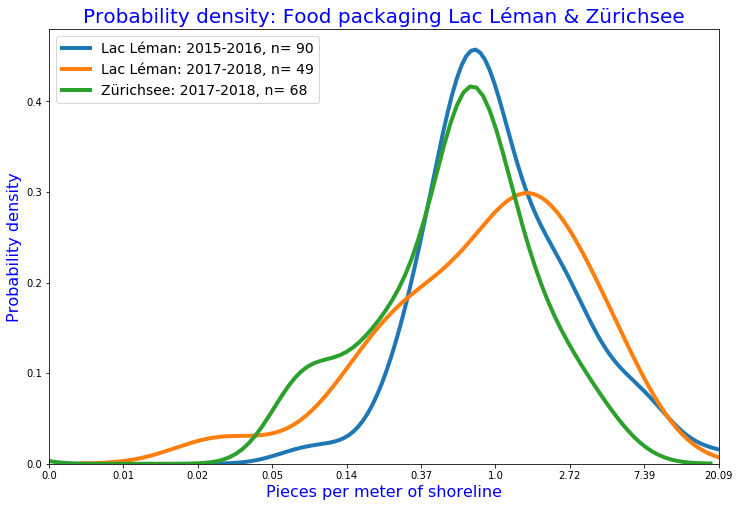

In [14]:
dists(l_one_g.Food_ln, l_two_g.Food_ln, z_see_g.Food_ln, 'Food packaging')

In [15]:
z_see_z = c_a[c_a.location_id.isin(zurich_see)].copy()

In [16]:
leman_one_95=leman_one.loc[leman_one.code_id == 'G95'].copy()
leman_two_95=leman_two.loc[leman_two.code_id == 'G95'].copy()
z_see_95=z_see_z.loc[z_see_z.code_id == 'G95'].copy()

In [17]:
leman_one_95[:3]

,code_id,date,density,length,location_id,quantity,city,latitude,longitude,post,water,pop,area,pop_dens
31,G95,2015-11-23,0.147541,61.0,Baye de Montreux - G,9.0,Montreux,46.430834,6.908778,1820.0,lake,26629.0,33.37,797.992209
62,G95,2015-12-04,0.065574,61.0,Baye de Montreux - D,4.0,Montreux,46.430962,6.908673,1820.0,lake,26629.0,33.37,797.992209
94,G95,2015-12-04,0.131148,61.0,Baye de Montreux - G,8.0,Montreux,46.430834,6.908778,1820.0,lake,26629.0,33.37,797.992209


In [18]:
def get_len(a):
    a['ln'] = np.log(a.density)
    return a
l_one_95 = get_len(leman_one_95)
l_two_95 = get_len(leman_two_95)
z_s_95 = get_len(z_see_95)

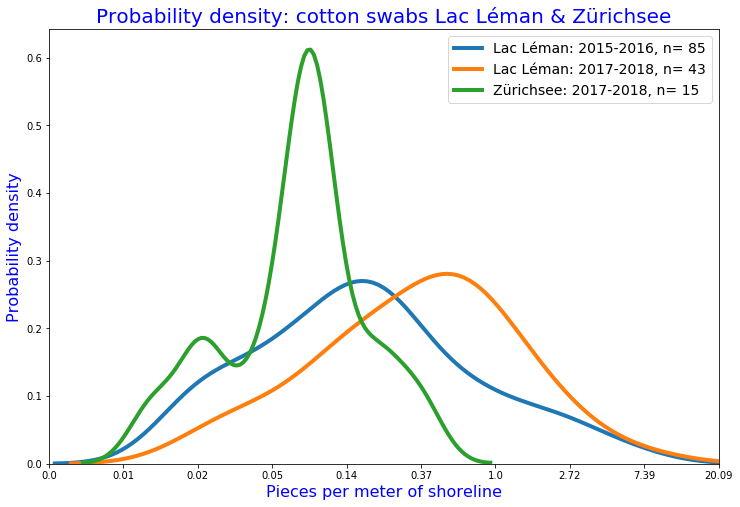

In [19]:
dists(l_one_95.ln, l_two_95.ln, z_s_95.ln, 'cotton swabs')

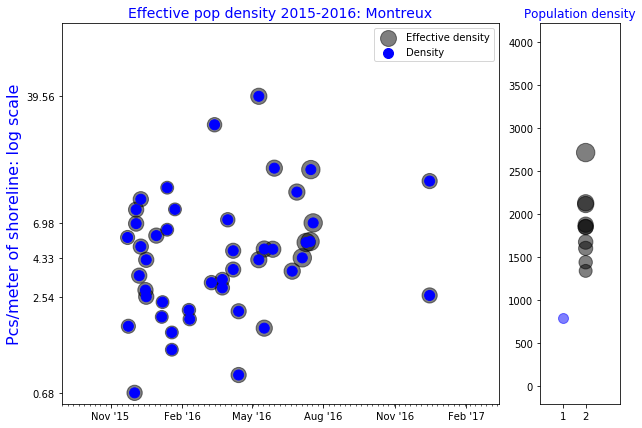

In [20]:
pop_scatter(montreux)